In [1]:
## Decision Tree: DT is a superised learning method used for classification and regression.
#     It works for both categorical and cotinuous i/p and o/p variables.
## Regression tree is used when dependent variable is continuous.
#     In case of regression, the tree will make splits such that each group has the lowest mean squared error.
## Classification trees are used when dependent variable is categorical.
# Node: Root Node, Decision Node, Leaf Node(Terminal Node)

In [2]:
# DT may get overfitted when they produce large, complicated decision trees that perfectly firt every training instance 
#      but fail to generalise that real relationship or unseen data.

In [3]:
## Avoid Overfitting: Pruning
## Pruning is a technique in machine learning that reduces the size of decision trees by removing sections of the tree 
#      that provide little power to classify instances. Pruning reduce the complexity of the final classifier and
#      hence improve predictive accuracy by the reduction of overfitting.

In [4]:
## Gini: Gini impurity is a measure of how often a randomly chosen subset from the available data would be incorrectly classify.
# Gini Index is criteria to measure the probability of misclassification.
#                     Gini= 1-∑p(j)^2 where p(j) is the probability of class j
# The lower the Gini Index the higher the purity of split. So the decision tree will select the split that minimizes the Gini Index

In [1]:
from sklearn.datasets import load_iris
iris= load_iris()

In [2]:
# x= iris.data
# y= iris.target
x= iris.data[:, 2:]
y= iris.target

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= .20, random_state= 1)

In [4]:
x_train.shape

(120, 2)

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
# max_depth= is the depth after which tree will stop
# min_samples_leaf= is the mini. value of no. of sample in leaf node
dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dt.feature_importances_

array([0.59660534, 0.40339466])

In [11]:
y_pred_dt = dt.predict(x_test)

In [12]:
y_pred_dt

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [13]:
print(dt.score(x_test, y_test))
dt.score(x_train, y_train)

0.9666666666666667


0.9916666666666667

In [14]:
import numpy as np
np.where(y_test != y_pred_dt)

(array([22], dtype=int64),)

In [15]:
## Graphviz
from sklearn.tree import export_graphviz
import graphviz

In [16]:
dot_data= export_graphviz(dt, out_file= None,
                          feature_names= iris.feature_names[2:],
                          class_names= iris.target_names,
                          rounded=True, filled= True)

In [17]:
print(dot_data)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="petal length (cm) <= 2.6\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]\nclass = virginica", fillcolor="#8139e510"] ;
1 [label="gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa", fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petal width (cm) <= 1.65\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]\nclass = virginica", fillcolor="#8139e529"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petal length (cm) <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor", fillcolor="#39e581e3"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor", fillcolor="#39e581ff"] ;
3 -> 4 ;
5 [label="petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica", fillcolor="#8139e5bf"] ;
3 -> 5 ;
6 [labe

In [18]:
import pydotplus
from IPython.display import Image

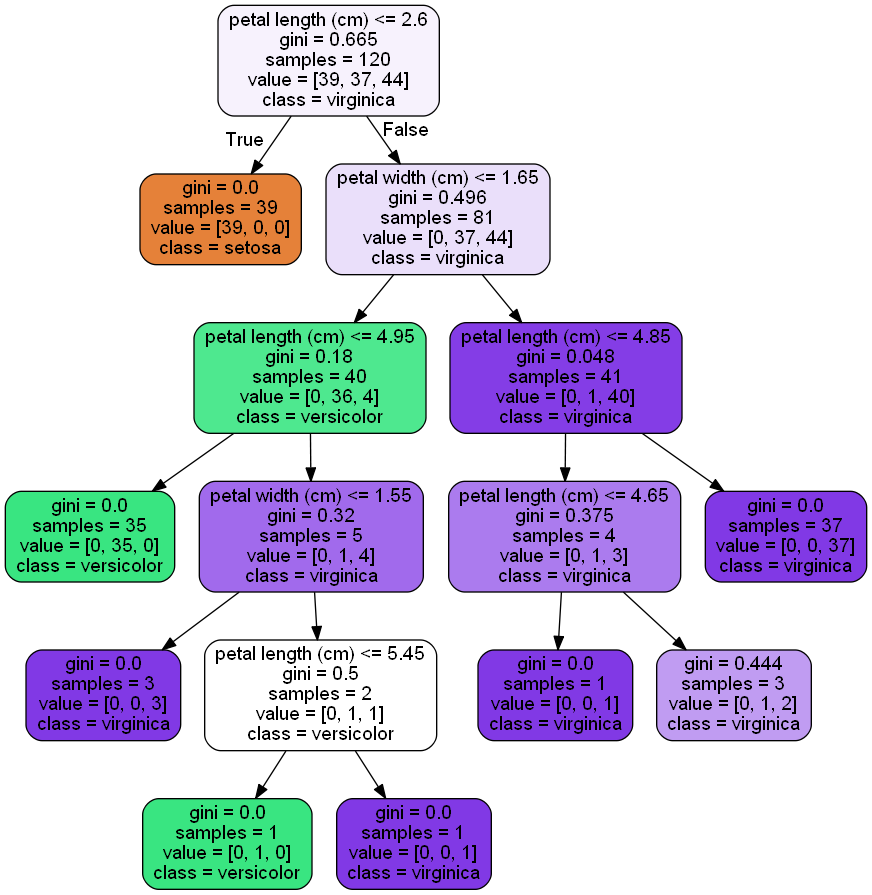

In [19]:
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [20]:
graph.write_png('Decision_Tree_Iris.png')

True

In [21]:
## Random Forest: It is a machine learning algorithm used for classification, regression and feature selection.
#      Random Forest algorithm is an ensemble technique. It means a group of classifiers. 
#      Instead of using only one classifier to predict the target, in ensemble we use multiple classifiers to predict the target.
#      In case of random forest, decision tree are created randomly. Each decision tree is a single classifier and 
#      the target prediction is based on the majority voting method.

## A random tree is a collection of decision tree that have been trained on randomly selected subsets of the training instances
#      and explanatory variables.
# Random forests usually make predictions by returning the mode or mean of the predictions of their constituent trees.
# Random forests are less prone to overfitting than decision trees because no single tree can learn from all of the instances 
#      and explanatory variables, no single tree can memorize all of the noise in the representation.

## From original data, multiple subsets are created (estimator) and each subset classifier is decision tree of its own which will predict.
#      then based on voting prediction is made.

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf1= RandomForestClassifier(n_estimators=10) # n_estimators= 100 default
# n_estimators will be no. of tress

In [23]:
rf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
y_pred_rf = rf1.predict(x_test)

In [25]:
print(rf1.score(x_test, y_test))
rf1.score(x_train, y_train)

0.9666666666666667


0.9916666666666667